In [3]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
%matplotlib inline
import csv
import itertools
import scipy.stats

In [ ]:
PlosOne_paper\Results\Segmentation_analysis\Results_DC_A_meanHU

** Read CSV with dice coefficients **

In [158]:
path_csv = 'F:/Rafael/GoogleDrive/IGT/Projects/DL_PectoralisSegmentation_casi_old/PectoralisSegmentation_Dice_test_2.csv'
csvfile = open(path_csv,'rU')
spamreader = csv.reader(csvfile,dialect=csv.excel_tab, delimiter = ',')

list_bad_segm = list()
csv_values = list()
names = spamreader.next()

for row in spamreader:
    aux = row
    csv_values.append(aux)
csvfile.close()

In [197]:
path_csv = 'F:/Rafael/GoogleDrive/IGT/Projects/DL_PectoralisSegmentation_casi_old/Research/PlosOne_paper/Results/Segmentation_analysis/Results_DC_A_meanHU/dice_individual_reduced_80.0.csv'
csvfile = open(path_csv,'rU')
spamreader = csv.reader(csvfile,dialect=csv.excel_tab, delimiter = ',')

list_bad_segm = list()
csv_values = list()
names = spamreader.next()

for row in spamreader:
    aux = row
    csv_values.append(aux)
csvfile.close()

In [161]:
p_value_all_all = list()

** DIce Coefficients From string to numpy array **

In [198]:
dice_coeff = []
for i in range(len(csv_values)):
    row = []
    for j in range(len(csv_values[i])):
        row.append(float(csv_values[i][j]))
        
    dice_coeff.append(row)
dice_coeff = np.array(dice_coeff)

In [199]:
dice_coeff = dice_coeff[:,1]
new_shape = dice_coeff.shape[0]/6
dice_coeff = dice_coeff.reshape((new_shape,6))

In [200]:
dice_coeff

array([[ 0.95296   ,  0.97119893,  0.95816146,  0.9783105 ,  0.97884468,
         0.96097097],
       [ 0.84648087,  0.91554054,  0.91322145,  0.92618712,  0.965138  ,
         0.8828171 ],
       [ 0.96027242,  0.97538696,  0.92809323,  0.97025538,  0.97892734,
         0.95990209],
       ..., 
       [ 0.94186533,  0.94333844,  0.94976427,  0.96484435,  0.97195829,
         0.96690192],
       [ 0.84215129,  0.82503696,  0.92325903,  0.94388594,  0.94553473,
         0.89089912],
       [ 0.90963257,  0.92883212,  0.91356578,  0.94087568,  0.97030013,
         0.9373494 ]])

In [205]:
dice_coeff = dice_coeff.round(2)

** Calculations of Differences between classes **

In [201]:
names = ['left_minor_pec',
 'right_minor_pec',
 'left_major_pec',
 'right_majot_pec',
 'left_fat',
 'right_fat']

In [221]:
pair_comb = list(itertools.combinations(range(6),2))

dice_ceff_diff = np.empty((dice_coeff.shape[0], len(pair_comb)))
names_diff = []

for i, pair in enumerate(pair_comb):
    dice_ceff_diff[:,i] = dice_coeff[:,pair[0]] - dice_coeff[:,pair[1]] 
    names_diff.append(names[pair[0]] + '-' + names[pair[1]])
    print names_diff[i]

left_minor_pec-right_minor_pec
left_minor_pec-left_major_pec
left_minor_pec-right_majot_pec
left_minor_pec-left_fat
left_minor_pec-right_fat
right_minor_pec-left_major_pec
right_minor_pec-right_majot_pec
right_minor_pec-left_fat
right_minor_pec-right_fat
left_major_pec-right_majot_pec
left_major_pec-left_fat
left_major_pec-right_fat
right_majot_pec-left_fat
right_majot_pec-right_fat
left_fat-right_fat


** STatistical Analysis **

In [207]:
p_value_all = np.empty(len(pair_comb))

print 'p-value:'
for i, pair in enumerate(pair_comb):
    a, p_value_all[i] = scipy.stats.wilcoxon(dice_ceff_diff[:,i])
    print names[pair[0]], '-', names[pair[1]], '=\t', p_value_all[i]

p-value:
left_minor_pec - right_minor_pec =	0.0066591338961
left_minor_pec - left_major_pec =	3.83995590126e-72
left_minor_pec - right_majot_pec =	2.59134076262e-140
left_minor_pec - left_fat =	5.14451975478e-219
left_minor_pec - right_fat =	9.60228118247e-135
right_minor_pec - left_major_pec =	1.94068321107e-59
right_minor_pec - right_majot_pec =	2.72068426602e-158
right_minor_pec - left_fat =	4.19810654821e-226
right_minor_pec - right_fat =	6.42416495955e-149
left_major_pec - right_majot_pec =	1.76192363823e-71
left_major_pec - left_fat =	5.76667150853e-123
left_major_pec - right_fat =	7.64520549151e-45
right_majot_pec - left_fat =	5.76452584147e-43
right_majot_pec - right_fat =	0.0408419490625
left_fat - right_fat =	3.40774297352e-79


In [208]:
p_value_all_all.append(p_value_all)

In [188]:
p_value_all_all[3]

array([  7.31723450e-004,   3.29669471e-095,   3.43756881e-162,
         7.40264890e-244,   4.52786998e-157,   3.90515480e-072,
         1.38169798e-181,   6.88571566e-247,   1.20311398e-168,
         5.69840085e-072,   6.90700717e-133,   1.65884597e-050,
         9.04213721e-049,   8.15138681e-004,   6.06477239e-084])

In [209]:
p_value_all_names = ['all', 'all_rounded', '74', '74_rounded', '80', '80_rounded']

In [121]:
p_value_all = np.empty(len(pair_comb))

print 'p-value:'
for i, pair in enumerate(pair_comb):
    a, p_value_all[i] = scipy.stats.ttest_ind(dice_coeff[:,pair[0]],dice_coeff[:,pair[1]],equal_var=False)
    print names[pair[0]], '-', names[pair[1]], '=\t', p_value_all[i]

p-value:
left_minor_pec - right_minor_pec =	0.128842043613
left_minor_pec - left_major_pec =	6.68546505314e-52
left_minor_pec - right_majot_pec =	2.34947277019e-107
left_minor_pec - left_fat =	3.52800072832e-155
left_minor_pec - right_fat =	3.6564748218e-86
right_minor_pec - left_major_pec =	3.67173768094e-45
right_minor_pec - right_majot_pec =	3.75497181233e-101
right_minor_pec - left_fat =	6.35428848746e-150
right_minor_pec - right_fat =	2.4403044653e-79
left_major_pec - right_majot_pec =	1.23857160574e-23
left_major_pec - left_fat =	1.43142187455e-64
left_major_pec - right_fat =	2.65202678403e-15
right_majot_pec - left_fat =	2.42908530874e-16
right_majot_pec - right_fat =	0.656206942336
left_fat - right_fat =	8.33698475271e-14


## To csv

** Coefficients to CSV **

In [108]:
path_new_csv = 'F:/Rafael/GoogleDrive/IGT/Projects/DL_PectoralisSegmentation_casi_old/PectoralisSegmentation_Dice_test_pair.csv'

save_diff = 1

if save_diff:
    new_csv_values = np.concatenate((dice_coeff, dice_ceff_diff), axis=1)
    header0 = names[:]
    header0.extend(names_diff)
else:
    new_csv_values = np.copy(dice_coeff)
    header0 = np.copy(names)

with open(path_new_csv, 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, dialect=csv.excel_tab, delimiter = ',')
    
    spamwriter.writerow(header0)

    for i in range(len(new_csv_values)):
        row = []
        for j in range(len(new_csv_values[i])):
            row.append(float(new_csv_values[i][j]))
        
        spamwriter.writerow(row)

** Save p-values all all **

In [210]:
all_p_values = np.array(p_value_all_all)

In [222]:
path_new_csv = 'F:/Rafael/GoogleDrive/IGT/Projects/DL_PectoralisSegmentation_casi_old/PectoralisSegmentation_Dice_wilcoxon_pvalues_all.csv'

p_value_all_names = ['difference', 'all', 'all_rounded', '74', '74_rounded', '80', '80_rounded']
header0 = p_value_all_names[:]
column0 = names_diff[:]
values = np.copy(all_p_values)

with open(path_new_csv, 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, dialect=csv.excel_tab, delimiter = ';')
    
    spamwriter.writerow(header0)

    for i in range(len(names_diff)):
        row = [column0[i]]
        row.extend(list(values[:,i]))
        
        spamwriter.writerow(row)

--------------------

** To csv mean , median, iqr, outlayers **

In [152]:
DC_median = np.median(dice_coeff, axis=(0))
DC_iqr = scipy.stats.iqr(dice_coeff, axis=0)
DC_mean = np.mean(dice_coeff, axis=(0))


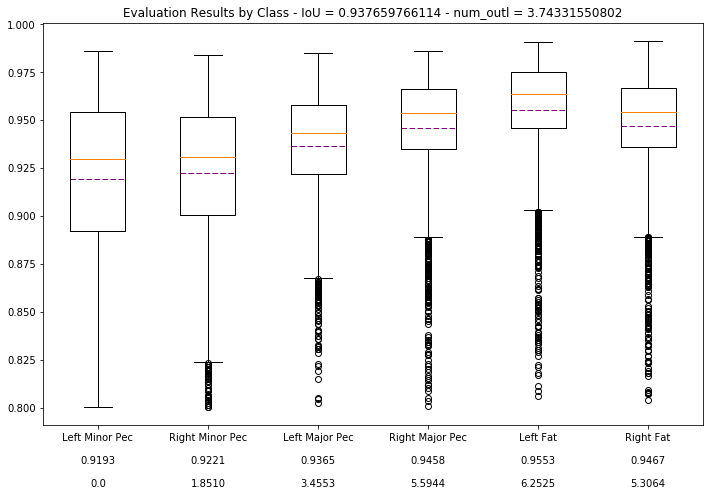

In [153]:
f, a = plt.subplots(1, 1, figsize=(10, 7))
meanlineprops = dict(linestyle='--', linewidth=1, color='purple')
r = a.boxplot(dice_coeff, meanprops=meanlineprops, meanline=True,
                   showmeans=True)

dice_coeff_mean_all = np.mean(dice_coeff,axis=0)
num_outlayers = list()
for i in range(6):
    num_outlayers.append(len(r["fliers"][i].get_data()[1])*100./dice_coeff.shape[0])
    
xticklabels_ = ('Left Minor Pec', 'Right Minor Pec', 'Left Major Pec', 'Right Major Pec', 'Left Fat', 'Right Fat')
xticklabels = list()
for i in range(6):
    xticklabels.append(xticklabels_[i] + '\n\n' + str(dice_coeff_mean_all[i])[0:6] + '\n\n' + str(num_outlayers[i])[0:6])
xticklabels = tuple(xticklabels)



a.set_xticklabels(xticklabels)
plt.title('Evaluation Results by Class - IoU = ' + str(np.mean(dice_coeff_mean_all)) + ' - num_outl = ' + str(np.mean(num_outlayers)))
plt.tight_layout()
path_pectoralis = 'F:/Rafael/GoogleDrive/IGT/Projects/DL_PectoralisSegmentation_casi_old/'
plt.savefig(path_pectoralis + "fig_1_allData_80.png", bbox_inches='tight')
plt.show()

In [154]:
DC_outlayers = np.copy(num_outlayers)

In [69]:
## Saving median and iqr

path_new_csv = 'F:/Rafael/GoogleDrive/IGT/Projects/DL_PectoralisSegmentation_casi_old/DC_median_iqr.csv

header0 = ['', 'median', 'iqr']

with open(path_new_csv, 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, dialect=csv.excel_tab, delimiter = ';')
    
    spamwriter.writerow(header0)

    for i in range(len(names)):
        row = [names[i], DC_median[i], DC_iqr[i]]      
        
        spamwriter.writerow(row)

In [156]:
## Saving mean, median, iqr and percetange of outlayers

path_new_csv = 'F:/Rafael/GoogleDrive/IGT/Projects/DL_PectoralisSegmentation_casi_old/DC_mean_median_iqr_outlayers_80.csv'

header0 = ['']
header0.extend(names[:])
header0.extend(['mean'])
column_0 = ['mean', 'median', 'iqr', 'outlayers']
values = [DC_mean, DC_median, DC_iqr, DC_outlayers]

with open(path_new_csv, 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, dialect=csv.excel_tab, delimiter = ';')
    
    spamwriter.writerow(header0)

    for i in range(len(column_0)):
        row = [column_0[i]]
        values[i] = values[i].round(4)
        row.extend(list(values[i]))
        row.extend([np.mean(values[i])])
        
        spamwriter.writerow(row)

--------------

## calculation of all p-values